# Use Support Vector Machines/Naïve Bayes to train your model and compare it with the other models. (use Sci-kit-learn library)

**Here we will compare between many different classification algorithms or models.For example, Suport Vector Machine(svc), K-Neighbors Classifier,Logistic Regression,Navie Bayes**


**Dataset:Titanic survival Dataset**

The datasets consist of ten different independent variables variables of passengers and one dependent variable, 'Survived'. Independent variables include Name, PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin,and Embarked.

In [0]:
import pandas as pd
import pandas.testing as tm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ClassificationReport
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv('/content/drive/My Drive/titanic_train.csv')
train.head()

In [0]:
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()
train.shape

(712, 11)

In [0]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
#drop the sex,embarked,name and tickets columns\n",
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
#concatenate new sex and embark column to our train dataframe\n",
train = pd.concat([train,sex,embark],axis=1)
#check the head of dataframe\n",
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Data Visualization

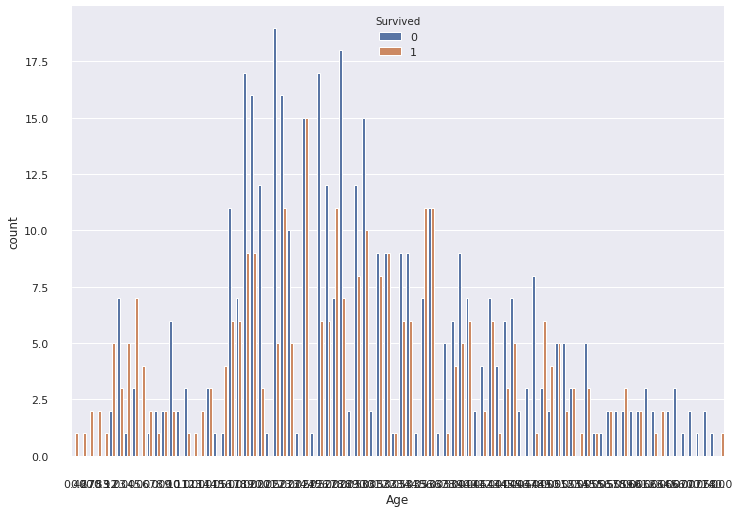

In [0]:
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})
# create a countplot
sns.countplot('Age',data=train,hue='Survived')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
# display the plotplt.show()

# Training Set & Test Set

In [0]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1), 
                   train['Survived'], test_size=0.30,
                    random_state=101)

# Building The Model and Performance Comparison

**Logistic Regression Overview**

Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.

In [0]:
lr =LogisticRegression(max_iter=1000,)
y_pred = lr.fit(x_train, y_train).predict(x_test)
print("Naive-Bayes accuracy : ",accuracy_score(y_test, y_pred, normalize = True))

Naive-Bayes accuracy :  0.8037383177570093


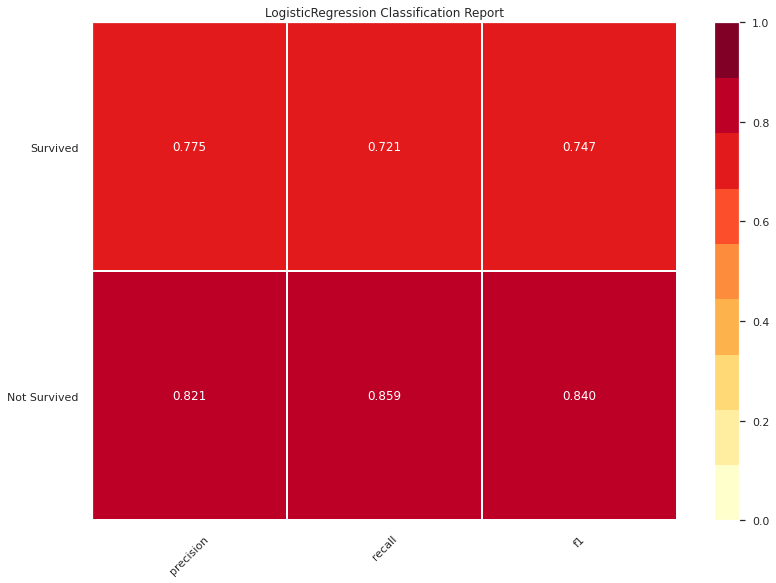

In [0]:
visualizer = ClassificationReport(lr, classes=['Not Survived','Survived'])
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test) 
g = visualizer.poof()

**Naive Bayes**

A set of classification algorithms which “naively” assumes that in a data set every pair of features are independent. This assumption is the underlying principle of Bayes theorem. The algorithms based on this principle are known as Naive-Bayes algorithms.
On a very high level a Naive-Bayes algorithm calculates the probability of the connection of a feature with a target variable and then it selects the feature with the highest probability.


In [0]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print("Naive-Bayes accuracy : ",accuracy_score(y_test, y_pred, normalize = True))

Naive-Bayes accuracy :  0.7663551401869159


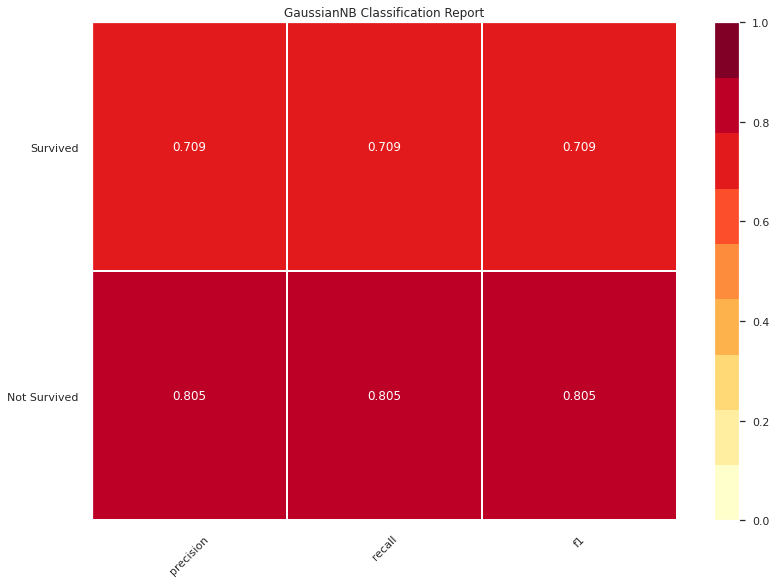

In [0]:
visualizer = ClassificationReport(gnb, classes=['Not Survived','Survived'])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
g = visualizer.poof()

**Support vector classification**

LinearSVC or Linear Support Vector Classification is a subclass of the SVM (Support Vector Machine) class. We won’t go into the intricacies of the mathematics involved in this class of algorithms, but on a very basic level LinearSVC tries to divide the data into different planes so that it can find a best possible grouping of different classes. 

In [0]:
svc_model = LinearSVC(max_iter=1000,)
y_pred = svc_model.fit(x_train, y_train).predict(x_test)
print("LinearSVC accuracy : ",accuracy_score(y_test, y_pred, normalize = True))

LinearSVC accuracy :  0.6728971962616822


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


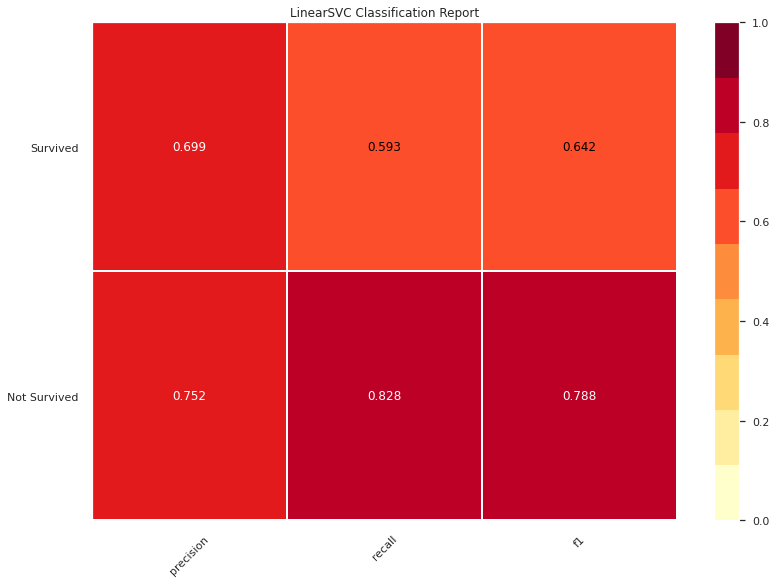

In [0]:
visualizer = ClassificationReport(svc_model,classes=['Not Survived','Survived'])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
g = visualizer.poof()

**K-Neighbors Classifier**

Compared to the previous two algorithms we’ve worked with, this classifier is a bit more complex. For the purposes of this tutorial we are better off using the KNeighborsClassifier class provided by scikit-learn without worrying much about how the algorithm works.

In [0]:
neigh = KNeighborsClassifier(n_neighbors=3)
y_pred = neigh.fit(x_train, y_train).predict(x_test)
print ("KNeighbors accuracy score : ",accuracy_score(y_test, y_pred))

KNeighbors accuracy score :  0.6308411214953271


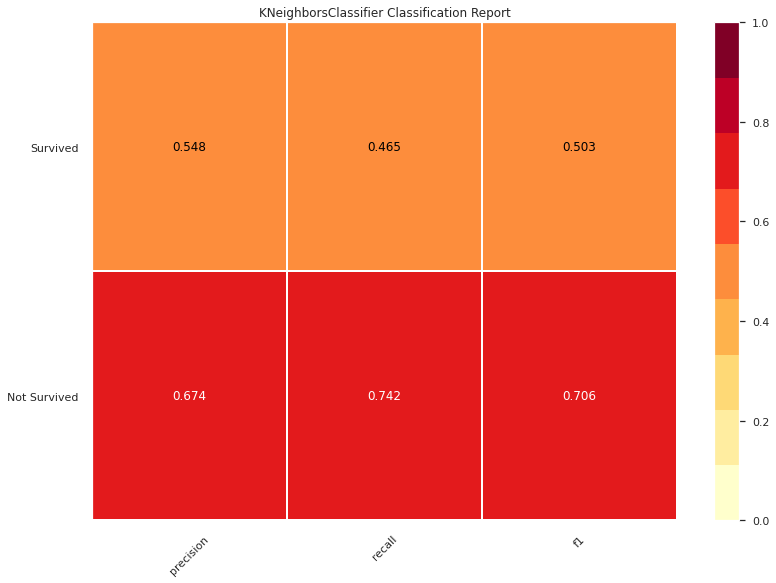

In [0]:
visualizer = ClassificationReport(neigh, classes=['Not Survived','Survived'])
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test) 
g = visualizer.poof() 